In [4]:
# -*- coding: UTF-8 -*-
from __future__ import print_function

import os

import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from util import split_image

data_dir = './data'
train_data_dir = os.path.join(data_dir, 'train')
test_data_dir = os.path.join(data_dir, 'test')

Using TensorFlow backend.


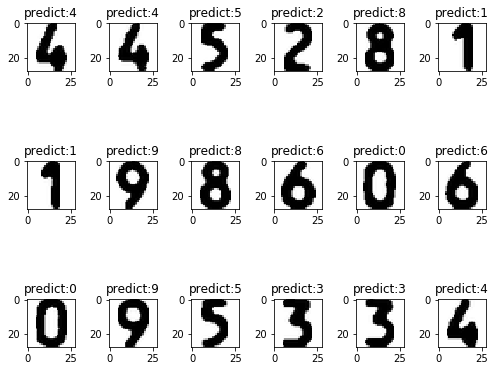

In [7]:
# dimensions of our images.
img_width, img_height = 28, 28
charset_size = 11
nb_validation_samples = 11
nb_samples_per_epoch = 11
nb_nb_epoch = 20
txt = "0123456789X"
log_filepath = '/tmp/keras_log'

def train(model):
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1
    )
    test_datagen = ImageDataGenerator(rescale=1. / 255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=1024,
        color_mode="grayscale",
        class_mode='categorical')
    validation_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=1024,
        color_mode="grayscale",
        class_mode='categorical')

    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(),
                  metrics=['accuracy'])

    tb_cb = keras.callbacks.TensorBoard(log_dir=log_filepath, write_images=1, histogram_freq=1)
    # 设置log的存储位置，将网络权值以图片格式保持在tensorboard中显示，设置每一个周期计算一次网络的
    # 权值，每层输出值的分布直方图
    cbks = [tb_cb]

    model.fit_generator(train_generator,
                        steps_per_epoch=nb_samples_per_epoch,
                        epochs=nb_nb_epoch,
                        validation_data=validation_generator,
                        validation_steps=nb_validation_samples,
                        )



def build_model(input_shape=(28, 28, 1), classes=charset_size):
    img_input = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    x = Dropout(0.1)(x)
    x = Flatten(name='flatten')(x)
    x = Dense(128, activation='relu', name='fc2')(x)
    x = Dropout(0.1)(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    model = Model(img_input, x, name='model')
    # 训练的正确率和误差，acc和loss 验证集正确率和误差val_acc和val_loss
    return model


def decode(y):
    y = np.argmax(y, axis=1)
#     print(y)
    return ''.join([txt[x] for x in y])


model = build_model()
# train(model)
# model.save("./model.h5")


model = load_model("./model.h5")


def squareImage(image, size=(28, 28)):
    wh1 = image.width / image.height
    wh2 = size[0] / size[1]
    newsize = ((int)(size[1] * wh1), (int)(size[1]))
    if wh1 > wh2:
        newsize = ((int)(size[0]), (int)(size[0] / wh1))

    image = image.resize(newsize, Image.ANTIALIAS)
    img_padded = Image.new("L", size, 255)
    img_padded.paste(image, (int((size[0] - image.size[0]) / 2), int((size[1] - image.size[1]) / 2)))
    return img_padded


# ocrIdCard("test1.png", "11204416541220243X")
# ocrIdCard("test2.png", "430523197603204314")
# ocrIdCard("test3.png", "37030519820727311X")
# ocrIdCard("test0.png", "445281198606095334")

fig, axes = plt.subplots(3, 6, figsize=(7, 6))
# print(axes.shape)
filename = "445281198606095334.png"
image = Image.open('test/'+filename).convert("LA")
cimgs = split_image(image)
i = 0
for img in cimgs:
    ii = i + 1
    img = squareImage(img)
    img.save("data/train/" + filename[i] + "/" + str(i) + "-" + filename)
    x = img_to_array(img)
    # reshape to array rank 4
    x = x.reshape((-1,) + x.shape)
#     print(x.shape)
    y_pred = model.predict(x)
#     print(model.predict(x))
#     print(i)
    axes[(int)(i / 6), (int)(i % 6)].set_title('predict:%s' % (decode(y_pred)))
    axes[(int)(i / 6), (int)(i % 6)].imshow(img, cmap='gray')
    i += 1

plt.tight_layout()
plt.show()


In [6]:
Image.open.convert?

Object `Image.open.convert` not found.
